<a href="https://colab.research.google.com/github/awikner/CHyPP/blob/master/TREND_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Dataset

In [1]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

## Import common libraries for data processing

In [3]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


## Import Plotting Libraries

In [4]:
import matplotlib.pyplot as plt

## Store the Median house value as the independent variable y and the number of rooms as the dependent variable X.

In [5]:
X = df["RM"].values.reshape(-1,1)
y = target["MEDV"].values.reshape(-1,1)

## Plot the data

Text(0, 0.5, 'House Price in $10000')

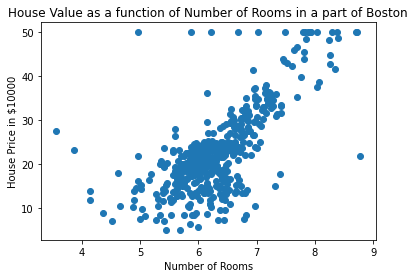

In [6]:
fig = plt.figure()
plt.scatter(X, y)
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')

## Analytically calculate the solution to the linear regression problem: w = (X'y)*(X'X)^{-1}

In [ ]:
w = np.dot( np.dot(X.T,y),(np.linalg.inv(np.dot(X.T, X))))

## Plot the model with the data

In [ ]:
Xlin = np.linspace(3, 9, 506).reshape(-1,1)
y_pred = Xlin*w
plt.plot(Xlin, y_pred, 'r--')
plt.scatter(X, y)
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')

## Calculate the solution to the linear regression with a python library: statsmodels

In [ ]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(Xlin) # make the predictions by the model
plt.plot(Xlin, predictions, 'b.')
plt.plot(Xlin, np.dot(Xlin,w), 'r--')
plt.scatter(X, y)

plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')

## Calculate the solution to the linear regression problem using stochastic gradient descent using a popular Machine learning package: Keras with Tensorflow

In [ ]:
!git clone https://github.com/awikner/TREND.git

In [ ]:
%run TREND/glasso.py

In [ ]:
[history, w_adam] = keras_regressor(X, y, num_epochs = 100, bsize = y.shape[0], learn_rate = 1e-1, N = 0, lam = 0.0)

## See that the ML technique gives a very similar solution as the analytical solution

In [ ]:
print(w_adam[0])
print(w[0])

## Plot both models together with the data and see that they concur

In [ ]:
y_pred = Xlin*w
y_pred_adam = Xlin*w_adam
plt.plot(Xlin, y_pred, 'r--')
plt.plot(Xlin, y_pred_adam, 'b--')
plt.scatter(X, y)
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')